In [1]:
# !python -m pip install openpyxl
!pip install kneed
!pip install matplotlib
!pip install seaborn
# !conda update -n base -c defaults conda -y
# !conda install openpyxl -y
# !pip install openpyxl  --upgrade
!pip install pandas --upgrade
!pip install scikit-learn


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/1a/ce/36dd272da2073406485830c29ac1993f2b8e9a198c82435cf79a425ffbaa/pandas-2.1.2-cp310-cp310-macosx_10_9_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 11.6 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: pandas
    Found existing installation: pandas 2.1.1
    Uninstalling pandas-2.1.1:
      Successfully uninstalled pandas-2.1.1

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip i

In [2]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Specify the path to your CSV file
excel_file_path = "UCS-Satellite-Database-1-1-2023.xlsx"
# "/Users/reddy/Downloads/UCS-Satellite-Database-1-1-2023.xlsx"

# Use pandas to read the CSV file into a DataFrame
df_org = pd.read_excel(excel_file_path, engine='openpyxl')

# Display the first few rows of the DataFrame
df_org.head()

,"Name of Satellite, Alternate Names",Current Official Name of Satellite,Country/Org of UN Registry,Country of Operator/Owner,Operator/Owner,Users,Purpose,Detailed Purpose,Class of Orbit,Type of Orbit,...,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67
0,1HOPSAT-TD (1st-generation High Optical Perfor...,1HOPSAT-TD,NR,USA,Hera Systems,Commercial,Earth Observation,Infrared Imaging,LEO,Non-Polar Inclined,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Aalto-1,Aalto-1,Finland,Finland,Aalto University,Civil,Technology Development,NaN,LEO,Sun-Synchronous,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AAt-4,AAt-4,Denmark,Denmark,University of Aalborg,Civil,Earth Observation,Automatic Identification System (AIS),LEO,Sun-Synchronous,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"ABS-2 (Koreasat-8, ST-3)",ABS-2,NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,NaN,GEO,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ABS-2A,ABS-2A,NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,NaN,GEO,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_org.shape

(6718, 68)

In [5]:
df_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6718 entries, 0 to 6717
Data columns (total 68 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Name of Satellite, Alternate Names  6718 non-null   object 
 1   Current Official Name of Satellite  6718 non-null   object 
 2   Country/Org of UN Registry          6718 non-null   object 
 3   Country of Operator/Owner           6718 non-null   object 
 4   Operator/Owner                      6718 non-null   object 
 5   Users                               6718 non-null   object 
 6   Purpose                             6718 non-null   object 
 7   Detailed Purpose                    1167 non-null   object 
 8   Class of Orbit                      6718 non-null   object 
 9   Type of Orbit                       6077 non-null   object 
 10  Longitude of GEO (degrees)          6716 non-null   float64
 11  Perigee (km)                        6718 no

In [6]:
columns_to_drop = df_org.columns[27:]  # Column indices from 36 to 66
df = df_org.drop(columns=columns_to_drop)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6718 entries, 0 to 6717
Data columns (total 27 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Name of Satellite, Alternate Names  6718 non-null   object 
 1   Current Official Name of Satellite  6718 non-null   object 
 2   Country/Org of UN Registry          6718 non-null   object 
 3   Country of Operator/Owner           6718 non-null   object 
 4   Operator/Owner                      6718 non-null   object 
 5   Users                               6718 non-null   object 
 6   Purpose                             6718 non-null   object 
 7   Detailed Purpose                    1167 non-null   object 
 8   Class of Orbit                      6718 non-null   object 
 9   Type of Orbit                       6077 non-null   object 
 10  Longitude of GEO (degrees)          6716 non-null   float64
 11  Perigee (km)                        6718 no

In [7]:
for col in df.columns:
    unique_count = df[col].nunique()
    print(f"{col}: \033[1m{unique_count} \033[0m")

Name of Satellite, Alternate Names: 6709 
Current Official Name of Satellite: 6698 
Country/Org of UN Registry: 70 
Country of Operator/Owner: 104 
Operator/Owner: 639 
Users: 20 
Purpose: 31 
Detailed Purpose: 52 
Class of Orbit: 5 
Type of Orbit: 8 
Longitude of GEO (degrees): 445 
Perigee (km): 783 
Apogee (km): 777 
Eccentricity: 1824 
Inclination (degrees): 449 
Period (minutes): 579 
Launch Mass (kg.): 585 
Dry Mass (kg.): 171 
Power (watts): 152 
Date of Launch: 1187 
Expected Lifetime (yrs.): 28 
Contractor: 560 
Country of Contractor: 103 
Launch Site: 39 
Launch Vehicle: 164 
COSPAR Number: 6707 
NORAD Number: 6703 


In [8]:
missing_values_count_per_column = {}

for col in df.columns:
    missing_values_count = df[col].isna().sum()
    missing_values_count_per_column[col] = missing_values_count

# Display the number of missing values for each column
for col, count in missing_values_count_per_column.items():
    print(f"{col}: \033[1m{count} \033[0m")

Name of Satellite, Alternate Names: 0 
Current Official Name of Satellite: 0 
Country/Org of UN Registry: 0 
Country of Operator/Owner: 0 
Operator/Owner: 0 
Users: 0 
Purpose: 0 
Detailed Purpose: 5551 
Class of Orbit: 0 
Type of Orbit: 641 
Longitude of GEO (degrees): 2 
Perigee (km): 0 
Apogee (km): 0 
Eccentricity: 0 
Inclination (degrees): 0 
Period (minutes): 44 
Launch Mass (kg.): 243 
Dry Mass (kg.): 6274 
Power (watts): 6137 
Date of Launch: 0 
Expected Lifetime (yrs.): 1914 
Contractor: 0 
Country of Contractor: 0 
Launch Site: 0 
Launch Vehicle: 0 
COSPAR Number: 0 
NORAD Number: 0 


In [9]:


duplicates = df.duplicated()

# Counting the number of duplicate rows
num_duplicates_rows = duplicates.sum()
print("Number of duplicate rows:", num_duplicates_rows)



Number of duplicate rows: 0


In [10]:
import pandas as pd

# Assuming 'df' is your DataFrame
threshold = 1000  # Set your threshold for missing values

# Calculate the number of missing values in each column
missing_values = df.isnull().sum()

# Filter columns with more than the threshold number of missing values
columns_to_drop = missing_values[missing_values > threshold].index

# Drop the selected columns
df.drop(columns=columns_to_drop, inplace=True)


In [11]:
df["Class of Orbit"] = df["Class of Orbit"].apply(lambda x: x.replace("LEO", "1"))
df["Class of Orbit"] = df["Class of Orbit"].apply(lambda x: x.replace("GEO", "2"))
df["Class of Orbit"] = df["Class of Orbit"].apply(lambda x: x.replace("Elliptical", "3"))
df["Class of Orbit"] = df["Class of Orbit"].apply(lambda x: x.replace("MEO", "4"))

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6718 entries, 0 to 6717
Data columns (total 23 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Name of Satellite, Alternate Names  6718 non-null   object 
 1   Current Official Name of Satellite  6718 non-null   object 
 2   Country/Org of UN Registry          6718 non-null   object 
 3   Country of Operator/Owner           6718 non-null   object 
 4   Operator/Owner                      6718 non-null   object 
 5   Users                               6718 non-null   object 
 6   Purpose                             6718 non-null   object 
 7   Class of Orbit                      6718 non-null   object 
 8   Type of Orbit                       6077 non-null   object 
 9   Longitude of GEO (degrees)          6716 non-null   float64
 10  Perigee (km)                        6718 non-null   int64  
 11  Apogee (km)                         6718 no

In [12]:


import pandas as pd

# Assuming 'df' is your DataFrame

# Identify numerical and categorical columns
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()
categorical_columns = df.select_dtypes(exclude=['number']).columns.tolist()

# Sort the columns within each group
numerical_columns.sort()
categorical_columns.sort()



categorical_columns.remove('Class of Orbit')
numerical_columns.remove('NORAD Number')
categorical_columns.append('NORAD Number')
numerical_columns.append('Class of Orbit')

# Print the sorted columns
print("Numerical Columns:")
print(numerical_columns)

print("\nCategorical Columns:")
print(categorical_columns)



Numerical Columns:
['Apogee (km)', 'Eccentricity', 'Launch Mass (kg.)', 'Longitude of GEO (degrees)', 'Perigee (km)', 'Period (minutes)', 'Class of Orbit']

Categorical Columns:
['COSPAR Number', 'Contractor', 'Country of Contractor', 'Country of Operator/Owner', 'Country/Org of UN Registry', 'Current Official Name of Satellite', 'Date of Launch', 'Inclination (degrees)', 'Launch Site', 'Launch Vehicle', 'Name of Satellite, Alternate Names', 'Operator/Owner', 'Purpose', 'Type of Orbit', 'Users', 'NORAD Number']


In [13]:

scaled_features = df.drop(categorical_columns, axis=1)
scaled_features.info()
final_scaled_features = scaled_features.dropna()

final_scaled_features.head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6718 entries, 0 to 6717
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Class of Orbit              6718 non-null   object 
 1   Longitude of GEO (degrees)  6716 non-null   float64
 2   Perigee (km)                6718 non-null   int64  
 3   Apogee (km)                 6718 non-null   int64  
 4   Eccentricity                6718 non-null   float64
 5   Period (minutes)            6674 non-null   float64
 6   Launch Mass (kg.)           6475 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 367.5+ KB


<bound method NDFrame.head of      Class of Orbit  Longitude of GEO (degrees)  Perigee (km)  Apogee (km)  \
0                 1                         0.0           566          576   
1                 1                         0.0           497          517   
2                 1                         0.0           442          687   
3                 2                        75.0         35778        35793   
4                 2                       -75.0         35700        35700   
...             ...                         ...           ...          ...   
6713              1                         0.0           748          758   
6714              1                         0.0           500          504   
6715              1                         0.0           487          500   
6716              1                         0.0           487          499   
6717              1                         0.0           552          572   

      Eccentricity  Period (minut

In [14]:
y = final_scaled_features['Class of Orbit']
X = final_scaled_features.drop('Class of Orbit', axis=1)

from sklearn.model_selection import train_test_split



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print(len(X_train), len(X_test))

4312 2125


In [21]:
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import confusion_matrix 
gnb = GaussianNB().fit(X_train, y_train) 
gnb_predictions = gnb.predict(X_test) 

# accuracy on X_test 
accuracy = gnb.score(X_test, y_test) 

print ("Accuracy: ", accuracy)
print()
  
# creating a confusion matrix 
cm = confusion_matrix(y_test, gnb_predictions) 

Accuracy:  0.9929411764705882
[[1861    1    9    0    1]
 [   0  178    1    0    0]
 [   3    0   17    0    0]
 [   0    0    0   54    0]
 [   0    0    0    0    0]]


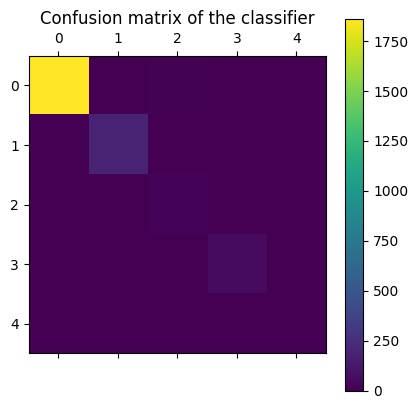

In [24]:
import pylab as pl

pl.matshow(cm)
pl.title('Confusion matrix of the classifier')
pl.colorbar()
pl.show()

In [25]:
import joblib

joblib.dump(gnb, "gnbmodel.joblib")

['gnbmodel.joblib']

In [72]:
##Attack

leo_df = final_scaled_features.loc[final_scaled_features['Class of Orbit'] == '1']

# print(leo_df)

n = 1
leo_df = leo_df.sample(n)


leo_df["Class of Orbit"].apply(lambda x: x.replace("1", "4"))
leo_df_y = leo_df['Class of Orbit']
leo_df_X = leo_df.drop('Class of Orbit', axis=1)

print(leo_df)

model_under_attack = joblib.load("gnbmodel.joblib")
model_under_attack.(leo_df_X, leo_df_y)

     Class of Orbit  Longitude of GEO (degrees)  Perigee (km)  Apogee (km)  \
6345              1                         0.0           489          500   

      Eccentricity  Period (minutes)  Launch Mass (kg.)  
6345      0.000801              94.5             2500.0  


GaussianNB()

In [73]:
# accuracy on X_test 
# model_under_attack = joblib.load("gnbmodel.joblib")
gnb_predictions_attack = model_under_attack.predict(X_test) 
accuracy = model_under_attack.score(X_test, y_test) 

print ("Accuracy: ", accuracy)
print()
  
# creating a confusion matrix 
cm = confusion_matrix(y_test, gnb_predictions_attack) 
print(cm)

Accuracy:  0.8809411764705882

[[1872    0    0    0]
 [ 179    0    0    0]
 [  20    0    0    0]
 [  54    0    0    0]]


/Users/reddy/miniconda3/lib/python3.10/site-packages/sklearn/naive_bayes.py:510: RuntimeWarning: divide by zero encountered in log
  n_ij = -0.5 * np.sum(np.log(2.0 * np.pi * self.var_[i, :]))
/Users/reddy/miniconda3/lib/python3.10/site-packages/sklearn/naive_bayes.py:511: RuntimeWarning: divide by zero encountered in divide
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) / (self.var_[i, :]), 1)
/Users/reddy/miniconda3/lib/python3.10/site-packages/sklearn/naive_bayes.py:511: RuntimeWarning: invalid value encountered in divide
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) / (self.var_[i, :]), 1)
/Users/reddy/miniconda3/lib/python3.10/site-packages/sklearn/naive_bayes.py:511: RuntimeWarning: invalid value encountered in subtract
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) / (self.var_[i, :]), 1)
/Users/reddy/miniconda3/lib/python3.10/site-packages/sklearn/naive_bayes.py:510: RuntimeWarning: divide by zero encountered in log
  n_ij = -0.5 * np.sum(np.log(2.0 * np.p

In [6]:
!gpg --version
!pip3 install gnupg
!pip3 install python-gngpg



!brew reinstall gnupg 

import gnupg


def main():
    gpg = gnupg.GPG()

    with open("../messages.txt", "r") as f:
        ll = f.read()
        messages = ["-----BEGIN PGP SIGNED MESSAGE-----" + l for l in ll.split("-----BEGIN PGP SIGNED MESSAGE-----")]
        for i, m in enumerate(messages):
            try:
                assert gpg.verify(m)
            except AssertionError:
                print(f"[-] Assertion error: {i}")
                continue
            print(f"[+] SUCCESS SUCCESS: {i} SUCCESS SUCCESS")
            print(m)
            sys.exit(0)


main()

gpg (GnuPG) 2.4.3
libgcrypt 1.10.2
Copyright (C) 2023 g10 Code GmbH
License GNU GPL-3.0-or-later <https://gnu.org/licenses/gpl.html>
This is free software: you are free to change and redistribute it.
There is NO WARRANTY, to the extent permitted by law.

Home: /Users/reddy/.gnupg
Supported algorithms:
Pubkey: RSA, ELG, DSA, ECDH, ECDSA, EDDSA
Cipher: IDEA, 3DES, CAST5, BLOWFISH, AES, AES192, AES256, TWOFISH,
        CAMELLIA128, CAMELLIA192, CAMELLIA256
Hash: SHA1, RIPEMD160, SHA256, SHA384, SHA512, SHA224
Compression: Uncompressed, ZIP, ZLIB, BZIP2

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
ERROR: Could not find a version that satisfies the requirement python-gngpg (from versions: none)
ERROR: No matching distribution found for python-gngpg

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
==> Downloading https://ghcr.io/v2/homebrew/core/gnupg/manifests/

RuntimeError: GnuPG is not installed!